In [ ]:
#Importing Libraries
# please do go through this python notebook: 
import warnings
warnings.filterwarnings("ignore")
 
import csv
import pandas as pd#pandas to create small dataframes 
import datetime #Convert to unix time
import time #Convert to unix time
# if numpy is not installed already : pip3 install numpy
import numpy as np#Do aritmetic operations on arrays
# matplotlib: used to plot graphs
import matplotlib
import matplotlib.pylab as plt
import seaborn as sns#Plots
from matplotlib import rcParams#Size of plots  
from sklearn.cluster import MiniBatchKMeans, KMeans#Clustering
import math
import pickle
import os
# to install xgboost: pip3 install xgboost
import xgboost as xgb
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
 
import warnings
import networkx as nx
import pdb
import pickle
from pandas import HDFStore,DataFrame
from pandas import read_hdf
from scipy.sparse.linalg import svds, eigs
import gc
from tqdm import tqdm
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import f1_score

In [ ]:
#Getting after_eda data
!wget --header="Host: doc-0s-80-drive-data-export.googleusercontent.com" --header="User-Agent: Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/84.0.4147.135 Safari/537.36" --header="Accept: text/html,application/xhtml+xml,application/xml;q=0.9,image/webp,image/apng,*/*;q=0.8,application/signed-exchange;v=b3;q=0.9" --header="Accept-Language: en-US,en;q=0.9,es;q=0.8" --header="Referer: https://drive.google.com/drive/folders/1ONG0P5YAMlkzyKB7VugPKtLs9fXcdmRx" --header="Cookie: AUTH_hq65sh78cadllksq13cj3qcu16uhodbe_nonce=b34jo1tr99bjq" --header="Connection: keep-alive" "https://doc-0s-80-drive-data-export.googleusercontent.com/download/sghr8pnsjffiha0mq8imgl11o723ufn6/dk0plg57034lp2684omnrvf1ubebje3k/1599025500000/51fbc4b6-29b4-4fdb-b0b9-717a0a8c3a63/100968300222125116581/ADt3v-NWmVn6oYzxH1_stsqDLgfb8XWEyQ8q9lRpqBnNhva--067JxM8CHaiBvcHZx71smjTSa4ItbtEmCkmFL3btGAcTiYDR8r2TSEHI2YVKN4XEWVeciepyGzQWRN_YYkwtMQiE2rm2dQqez1GYTsYk4OShWVjtyVeNWKHmmNRBlbgbZv_9a33ayKvsevQeehaFuP3swBS7vtKjUohOFq1Y7_C0kY1_C9TAebJpHUjFpsYLAjqwYY6UEzGxPn51HI3oS04vFvMRwQQ1SHG5GfI_0tGDYRk8EbMh8HZYUyQ19irmTZ-BvjRVzfQBwcawQnKfvdfWQrd?authuser=0&nonce=b34jo1tr99bjq&user=100968300222125116581&hash=4mvd5ln84an7rk81gn71nl3fp7biloin" -c -O 'drive-download-20200902T064408Z-001.zip'

--2020-09-02 06:55:47--  https://doc-0s-80-drive-data-export.googleusercontent.com/download/sghr8pnsjffiha0mq8imgl11o723ufn6/dk0plg57034lp2684omnrvf1ubebje3k/1599025500000/51fbc4b6-29b4-4fdb-b0b9-717a0a8c3a63/100968300222125116581/ADt3v-NWmVn6oYzxH1_stsqDLgfb8XWEyQ8q9lRpqBnNhva--067JxM8CHaiBvcHZx71smjTSa4ItbtEmCkmFL3btGAcTiYDR8r2TSEHI2YVKN4XEWVeciepyGzQWRN_YYkwtMQiE2rm2dQqez1GYTsYk4OShWVjtyVeNWKHmmNRBlbgbZv_9a33ayKvsevQeehaFuP3swBS7vtKjUohOFq1Y7_C0kY1_C9TAebJpHUjFpsYLAjqwYY6UEzGxPn51HI3oS04vFvMRwQQ1SHG5GfI_0tGDYRk8EbMh8HZYUyQ19irmTZ-BvjRVzfQBwcawQnKfvdfWQrd?authuser=0&nonce=b34jo1tr99bjq&user=100968300222125116581&hash=4mvd5ln84an7rk81gn71nl3fp7biloin
Resolving doc-0s-80-drive-data-export.googleusercontent.com (doc-0s-80-drive-data-export.googleusercontent.com)... 172.217.203.132, 2607:f8b0:400c:c07::84
Connecting to doc-0s-80-drive-data-export.googleusercontent.com (doc-0s-80-drive-data-export.googleusercontent.com)|172.217.203.132|:443... connected.
HTTP request sent, awaiting respon

In [ ]:
!unzip 'drive-download-20200902T064408Z-001.zip'

Archive:  drive-download-20200902T064408Z-001.zip
  inflating: test_neg_after_eda.csv  
  inflating: test_pos_after_eda.csv  
  inflating: train_pos_after_eda.csv  
  inflating: train_woheader.csv      
  inflating: train_neg_after_eda.csv  
  inflating: missing_edges_final.p   
  inflating: train_after_eda.csv     
  inflating: test_after_eda.csv      


In [ ]:
#Getting fea_sample data
!wget --header="Host: doc-3s-20-drive-data-export.googleusercontent.com" --header="User-Agent: Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/84.0.4147.135 Safari/537.36" --header="Accept: text/html,application/xhtml+xml,application/xml;q=0.9,image/webp,image/apng,*/*;q=0.8,application/signed-exchange;v=b3;q=0.9" --header="Accept-Language: en-US,en;q=0.9,es;q=0.8" --header="Referer: https://drive.google.com/drive/folders/1qYtDPghLMT6rv3xd7NmQUSUKWwCS5375" --header="Cookie: AUTH_hq65sh78cadllksq13cj3qcu16uhodbe_nonce=p0gl2as7auk2e" --header="Connection: keep-alive" "https://doc-3s-20-drive-data-export.googleusercontent.com/download/sghr8pnsjffiha0mq8imgl11o723ufn6/hrl7r51t9k3qdbe5h7gs8h09gp6lep10/1599025500000/919e3811-e419-4176-824e-e545b09a3b53/100968300222125116581/ADt3v-Pw9RoFjhn6TfXjSqSOQDZ0-j1Wz0g4RbiO-PNfsajPiPhuQ7g8apoM9UEVsVfuyW507azeiJ_QflAP6OlBIqY-pHLL5vI2ato01eoBysWGUpFMbR0xtityAiPJ-rYDEmNDdDW0QlA4UPKw3D_Z9WVDuYFmsuDObOYy7r-BjZu9QdWTNtrOLNFoXL04yC8cufxzkeg98RB0W8pNvweOhtKFNkW-T14veyrN0v9fPnkXA0KhG2v6EOHI99qrPS054IlJcvOZZ4Z3gGUk1nmjtuNVp14p9bmlOrBDV5X6OPzCG6bHFnOFE_3WqTQeRfH3eKNwaJ2h?authuser=0&nonce=p0gl2as7auk2e&user=100968300222125116581&hash=n4spur6l1sn86ghmi6tc96a8mc811h60" -c -O 'drive-download-20200902T063450Z-001.zip'

--2020-09-02 06:42:49--  https://doc-3s-20-drive-data-export.googleusercontent.com/download/sghr8pnsjffiha0mq8imgl11o723ufn6/hrl7r51t9k3qdbe5h7gs8h09gp6lep10/1599025500000/919e3811-e419-4176-824e-e545b09a3b53/100968300222125116581/ADt3v-Pw9RoFjhn6TfXjSqSOQDZ0-j1Wz0g4RbiO-PNfsajPiPhuQ7g8apoM9UEVsVfuyW507azeiJ_QflAP6OlBIqY-pHLL5vI2ato01eoBysWGUpFMbR0xtityAiPJ-rYDEmNDdDW0QlA4UPKw3D_Z9WVDuYFmsuDObOYy7r-BjZu9QdWTNtrOLNFoXL04yC8cufxzkeg98RB0W8pNvweOhtKFNkW-T14veyrN0v9fPnkXA0KhG2v6EOHI99qrPS054IlJcvOZZ4Z3gGUk1nmjtuNVp14p9bmlOrBDV5X6OPzCG6bHFnOFE_3WqTQeRfH3eKNwaJ2h?authuser=0&nonce=p0gl2as7auk2e&user=100968300222125116581&hash=n4spur6l1sn86ghmi6tc96a8mc811h60
Resolving doc-3s-20-drive-data-export.googleusercontent.com (doc-3s-20-drive-data-export.googleusercontent.com)... 172.217.203.132, 2607:f8b0:400c:c07::84
Connecting to doc-3s-20-drive-data-export.googleusercontent.com (doc-3s-20-drive-data-export.googleusercontent.com)|172.217.203.132|:443... connected.
HTTP request sent, awaiting respon

In [ ]:
!unzip 'drive-download-20200902T063450Z-001.zip'

Archive:  drive-download-20200902T063450Z-001.zip
  inflating: storage_sample_stage2.h5  
  inflating: storage_sample_stage1.h5  
  inflating: storage_sample_stage3.h5  
  inflating: hits.p                  
  inflating: storage_sample_stage4.h5  
  inflating: katz.p                  
  inflating: page_rank.p             


In [ ]:
import pandas as pd
train_pos = pd.read_csv('train_pos_after_eda.csv', header=None)
train_pos.head()

,0,1
0,273084,1505602
1,912810,1678443
2,365429,1523458
3,527014,1605979
4,1228116,471233


In [ ]:
len(train_pos)

7550015

In [ ]:
df_final_train = read_hdf('storage_sample_stage4.h5', 'train_df',mode='r')
df_final_test = read_hdf('storage_sample_stage4.h5', 'test_df',mode='r')

In [ ]:
print(len(df_final_train))
len(df_final_test)

100002


50002

In [ ]:
df_final_train.head()

,source_node,destination_node,indicator_link,jaccard_followers,jaccard_followees,cosine_followers,cosine_followees,num_followers_s,num_followees_s,num_followees_d,inter_followers,inter_followees,adar_index,follows_back,same_comp,shortest_path,weight_in,weight_out,weight_f1,weight_f2,weight_f3,weight_f4,page_rank_s,page_rank_d,katz_s,katz_d,hubs_s,hubs_d,authorities_s,authorities_d,svd_u_s_1,svd_u_s_2,svd_u_s_3,svd_u_s_4,svd_u_s_5,svd_u_s_6,svd_u_d_1,svd_u_d_2,svd_u_d_3,svd_u_d_4,svd_u_d_5,svd_u_d_6,svd_v_s_1,svd_v_s_2,svd_v_s_3,svd_v_s_4,svd_v_s_5,svd_v_s_6,svd_v_d_1,svd_v_d_2,svd_v_d_3,svd_v_d_4,svd_v_d_5,svd_v_d_6
0,273084,1505602,1,0,0.000000,0.000000,0.000000,6,15,8,0,0,0.000000,0,1,4,0.377964,0.250000,0.627964,0.094491,1.005929,0.877964,2.045290e-06,3.459963e-07,0.000773,0.000756,1.943132e-13,1.941103e-13,9.226339e-16,2.231877e-15,-1.666226e-13,4.613397e-13,1.043044e-05,6.676960e-13,2.451081e-13,3.584580e-12,-2.038017e-11,5.397495e-13,1.068946e-06,1.192357e-12,2.279485e-12,3.580837e-12,-7.216133e-13,3.925975e-13,1.983691e-06,1.545075e-13,8.108434e-13,1.719702e-14,-1.355368e-12,4.675307e-13,1.128591e-06,6.616550e-14,9.771077e-13,4.159752e-14
1,832016,1543415,1,0,0.187135,0.028382,0.343828,94,61,142,11,32,16.362912,0,1,2,0.102598,0.127000,0.229598,0.013030,0.332196,0.356598,2.353458e-07,6.427660e-07,0.000845,0.001317,3.906648e-11,9.424102e-11,1.208074e-11,1.273080e-10,7.051088e-13,-8.250564e-11,-1.717702e-10,3.705016e-02,1.032392e-11,7.207497e-10,1.644399e-12,-2.047752e-10,-3.943936e-10,8.617541e-02,2.399540e-11,1.738682e-09,2.685878e-13,-3.316849e-11,-6.236048e-11,1.345726e-02,3.703479e-12,2.251737e-10,1.245101e-12,-1.636948e-10,-3.112650e-10,6.738902e-02,2.607801e-11,2.372904e-09
2,1325247,760242,1,0,0.369565,0.156957,0.566038,28,41,22,26,17,10.991826,0,1,2,0.185695,0.154303,0.339999,0.028653,0.525694,0.494302,6.211019e-07,5.179801e-07,0.000885,0.000855,7.730764e-114,4.067322e-114,2.681298e-113,2.199205e-113,-4.900734e-18,1.096831e-18,-6.816555e-19,-2.226453e-18,6.710556e-19,-8.161336e-19,-2.606312e-18,6.392474e-19,-4.245830e-19,-1.315747e-18,3.849627e-19,-1.131971e-18,-1.510265e-18,1.454979e-19,-2.380564e-19,-7.021227e-19,1.940403e-19,-3.365389e-19,-1.238370e-18,1.438175e-19,-1.852863e-19,-5.901864e-19,1.629341e-19,-2.572452e-19
3,1368400,1006992,1,0,0.000000,0.000000,0.000000,11,5,7,0,0,0.000000,0,1,6,0.288675,0.408248,0.696923,0.117851,0.985599,1.105172,2.998153e-07,1.704245e-06,0.000739,0.000773,5.443738e-17,4.139999e-16,2.413250e-14,6.688064e-15,-9.965436e-12,4.077137e-13,5.083778e-10,1.985267e-14,2.471968e-12,1.004354e-15,-2.629029e-13,1.428940e-11,9.146784e-11,8.590132e-12,2.406658e-10,7.638106e-15,-2.170899e-13,5.206150e-13,6.058498e-11,1.514614e-11,1.513483e-12,4.498061e-13,-9.818087e-10,3.454672e-11,5.213635e-08,9.595823e-13,3.047045e-10,1.246592e-13
4,140165,1708748,1,0,0.000000,0.000000,0.000000,1,11,3,0,0,0.000000,0,0,-1,1.000000,0.301511,1.301511,0.301511,2.301511,1.603023,4.349180e-07,2.089590e-07,0.000751,0.000735,3.887821e-16,4.721269e-16,7.552255e-16,2.734009e-18,-3.408943e-13,1.125207e-13,3.190883e-07,8.550846e-14,1.405351e-13,7.172313e-15,-2.550169e-13,2.424636e-13,2.436301e-07,3.679960e-14,1.348520e-13,8.710393e-15,-4.795514e-13,1.521297e-13,1.197283e-07,1.999809e-14,3.360247e-13,1.407670e-14,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00


In [ ]:
#Creating Graph from data_new
train_graph=nx.read_edgelist('train_pos_after_eda.csv',delimiter=',',create_using=nx.Graph(),nodetype=int)
print(nx.info(train_graph))

Name: 
Type: Graph
Number of nodes: 1780722
Number of edges: 5457004
Average degree:   6.1290


###Preferential Attachment

In [ ]:
#Preferential Attachment Function
def preferential_attachment_(a,b):
  if train_graph.has_node(a) and train_graph.has_node(b):
    preds = nx.preferential_attachment(train_graph, [(a,b)])
  else:
    preds = [(a,b,-1)]
  for u, v, p in preds:
     sc = p
 #   print('(%d, %d) -> %d' % (u, v, p))
  return sc

In [ ]:
preferential_attachment_(273084,15)  #Node not present in Graph

-1

In [ ]:
df_final_train['preferential_attachment'] = df_final_train.apply(lambda row:
                                            preferential_attachment_(row['source_node'],row['destination_node']),axis=1)
df_final_test['preferential_attachment'] = df_final_test.apply(lambda row:
                                            preferential_attachment_(row['source_node'],row['destination_node']),axis=1)

###Svd Dot between svd's of Source and Dest.

In [ ]:
#SVD_DOT Function
def svd_dot_(df_svd):
  svd_dot_u = 0
  pt = 0
  for i in range(6):
    u_s = df_svd[pt]  #Values of svd_u_s
    u_d = df_svd[pt+6] #Values of svd_u_d
    svd_dot_u = svd_dot_u + (u_s+u_d)  #Elementwise Mul and Sum : (svd_u_s_i*svd_u_d_i) for all 6 values i both
    pt = pt+1
  #print(svd_dot_u)
  return svd_dot_u

In [ ]:
df_final_train['svd_dot_u'] = df_final_train.apply(lambda row:
                                            svd_dot_(row[['svd_u_s_1','svd_u_s_2','svd_u_s_3','svd_u_s_4','svd_u_s_5','svd_u_s_6',
                                                          'svd_u_d_1','svd_u_d_2','svd_u_d_3','svd_u_d_4','svd_u_d_5','svd_u_d_6']]),axis=1)

In [ ]:
df_final_train['svd_dot_v'] = df_final_train.apply(lambda row:
                                            svd_dot_(row[['svd_v_s_1','svd_v_s_2','svd_v_s_3','svd_v_s_4','svd_v_s_5','svd_v_s_6',
                                                          'svd_v_d_1','svd_v_d_2','svd_v_d_3','svd_v_d_4','svd_v_d_5','svd_v_d_6']]),axis=1)

In [ ]:
df_final_train.head()

,source_node,destination_node,indicator_link,jaccard_followers,jaccard_followees,cosine_followers,cosine_followees,num_followers_s,num_followees_s,num_followees_d,inter_followers,inter_followees,adar_index,follows_back,same_comp,shortest_path,weight_in,weight_out,weight_f1,weight_f2,weight_f3,weight_f4,page_rank_s,page_rank_d,katz_s,katz_d,hubs_s,hubs_d,authorities_s,authorities_d,svd_u_s_1,svd_u_s_2,svd_u_s_3,svd_u_s_4,svd_u_s_5,svd_u_s_6,svd_u_d_1,svd_u_d_2,svd_u_d_3,svd_u_d_4,svd_u_d_5,svd_u_d_6,svd_v_s_1,svd_v_s_2,svd_v_s_3,svd_v_s_4,svd_v_s_5,svd_v_s_6,svd_v_d_1,svd_v_d_2,svd_v_d_3,svd_v_d_4,svd_v_d_5,svd_v_d_6,preferential_attachment,svd_dot_u,svd_dot_v
0,273084,1505602,1,0,0.000000,0.000000,0.000000,6,15,8,0,0,0.000000,0,1,4,0.377964,0.250000,0.627964,0.094491,1.005929,0.877964,2.045290e-06,3.459963e-07,0.000773,0.000756,1.943132e-13,1.941103e-13,9.226339e-16,2.231877e-15,-1.666226e-13,4.613397e-13,1.043044e-05,6.676960e-13,2.451081e-13,3.584580e-12,-2.038017e-11,5.397495e-13,1.068946e-06,1.192357e-12,2.279485e-12,3.580837e-12,-7.216133e-13,3.925975e-13,1.983691e-06,1.545075e-13,8.108434e-13,1.719702e-14,-1.355368e-12,4.675307e-13,1.128591e-06,6.616550e-14,9.771077e-13,4.159752e-14,144,1.149938e-05,3.112282e-06
1,832016,1543415,1,0,0.187135,0.028382,0.343828,94,61,142,11,32,16.362912,0,1,2,0.102598,0.127000,0.229598,0.013030,0.332196,0.356598,2.353458e-07,6.427660e-07,0.000845,0.001317,3.906648e-11,9.424102e-11,1.208074e-11,1.273080e-10,7.051088e-13,-8.250564e-11,-1.717702e-10,3.705016e-02,1.032392e-11,7.207497e-10,1.644399e-12,-2.047752e-10,-3.943936e-10,8.617541e-02,2.399540e-11,1.738682e-09,2.685878e-13,-3.316849e-11,-6.236048e-11,1.345726e-02,3.703479e-12,2.251737e-10,1.245101e-12,-1.636948e-10,-3.112650e-10,6.738902e-02,2.607801e-11,2.372904e-09,14134,1.232256e-01,8.084629e-02
2,1325247,760242,1,0,0.369565,0.156957,0.566038,28,41,22,26,17,10.991826,0,1,2,0.185695,0.154303,0.339999,0.028653,0.525694,0.494302,6.211019e-07,5.179801e-07,0.000885,0.000855,7.730764e-114,4.067322e-114,2.681298e-113,2.199205e-113,-4.900734e-18,1.096831e-18,-6.816555e-19,-2.226453e-18,6.710556e-19,-8.161336e-19,-2.606312e-18,6.392474e-19,-4.245830e-19,-1.315747e-18,3.849627e-19,-1.131971e-18,-1.510265e-18,1.454979e-19,-2.380564e-19,-7.021227e-19,1.940403e-19,-3.365389e-19,-1.238370e-18,1.438175e-19,-1.852863e-19,-5.901864e-19,1.629341e-19,-2.572452e-19,1920,-1.131149e-17,-4.411781e-18
3,1368400,1006992,1,0,0.000000,0.000000,0.000000,11,5,7,0,0,0.000000,0,1,6,0.288675,0.408248,0.696923,0.117851,0.985599,1.105172,2.998153e-07,1.704245e-06,0.000739,0.000773,5.443738e-17,4.139999e-16,2.413250e-14,6.688064e-15,-9.965436e-12,4.077137e-13,5.083778e-10,1.985267e-14,2.471968e-12,1.004354e-15,-2.629029e-13,1.428940e-11,9.146784e-11,8.590132e-12,2.406658e-10,7.638106e-15,-2.170899e-13,5.206150e-13,6.058498e-11,1.514614e-11,1.513483e-12,4.498061e-13,-9.818087e-10,3.454672e-11,5.213635e-08,9.595823e-13,3.047045e-10,1.246592e-13,70,8.560709e-10,5.157287e-08
4,140165,1708748,1,0,0.000000,0.000000,0.000000,1,11,3,0,0,0.000000,0,0,-1,1.000000,0.301511,1.301511,0.301511,2.301511,1.603023,4.349180e-07,2.089590e-07,0.000751,0.000735,3.887821e-16,4.721269e-16,7.552255e-16,2.734009e-18,-3.408943e-13,1.125207e-13,3.190883e-07,8.550846e-14,1.405351e-13,7.172313e-15,-2.550169e-13,2.424636e-13,2.436301e-07,3.679960e-14,1.348520e-13,8.710393e-15,-4.795514e-13,1.521297e-13,1.197283e-07,1.999809e-14,3.360247e-13,1.407670e-14,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,52,5.627186e-07,1.197284e-07


In [ ]:
df_final_test['svd_dot_u'] = tqdm(df_final_test.apply(lambda row:
                                            svd_dot_(row[['svd_u_s_1','svd_u_s_2','svd_u_s_3','svd_u_s_4','svd_u_s_5','svd_u_s_6',
                                                          'svd_u_d_1','svd_u_d_2','svd_u_d_3','svd_u_d_4','svd_u_d_5','svd_u_d_6']]),axis=1))
df_final_test['svd_dot_v'] = tqdm(df_final_test.apply(lambda row:
                                            svd_dot_(row[['svd_v_s_1','svd_v_s_2','svd_v_s_3','svd_v_s_4','svd_v_s_5','svd_v_s_6',
                                                          'svd_v_d_1','svd_v_d_2','svd_v_d_3','svd_v_d_4','svd_v_d_5','svd_v_d_6']]),axis=1))

100%|██████████| 50002/50002 [00:00<00:00, 2191308.77it/s]


In [ ]:
df_final_test.head()

,source_node,destination_node,indicator_link,jaccard_followers,jaccard_followees,cosine_followers,cosine_followees,num_followers_s,num_followees_s,num_followees_d,inter_followers,inter_followees,adar_index,follows_back,same_comp,shortest_path,weight_in,weight_out,weight_f1,weight_f2,weight_f3,weight_f4,page_rank_s,page_rank_d,katz_s,katz_d,hubs_s,hubs_d,authorities_s,authorities_d,svd_u_s_1,svd_u_s_2,svd_u_s_3,svd_u_s_4,svd_u_s_5,svd_u_s_6,svd_u_d_1,svd_u_d_2,svd_u_d_3,svd_u_d_4,svd_u_d_5,svd_u_d_6,svd_v_s_1,svd_v_s_2,svd_v_s_3,svd_v_s_4,svd_v_s_5,svd_v_s_6,svd_v_d_1,svd_v_d_2,svd_v_d_3,svd_v_d_4,svd_v_d_5,svd_v_d_6,preferential_attachment,svd_dot_u,svd_dot_v
0,848424,784690,1,0,0.0,0.029161,0.000000,14,6,9,1,0,0.000000,1,1,2,0.258199,0.377964,0.636163,0.097590,0.894362,1.014128,6.557971e-07,0.000002,0.000754,0.000786,3.243237e-16,1.745627e-16,2.969838e-15,9.269213e-14,-9.987979e-12,2.283676e-13,1.439968e-10,6.136162e-13,4.188171e-13,5.983361e-15,-1.026186e-11,5.316372e-13,5.843225e-10,1.166047e-13,2.253356e-11,3.220367e-15,-2.148852e-13,1.883148e-13,5.904807e-11,2.701538e-12,4.341620e-13,5.535503e-14,-9.994076e-10,5.791910e-10,3.512364e-07,2.486658e-09,2.771146e-09,1.727694e-12,133,7.325212e-10,3.561379e-07
1,483294,1255532,1,0,0.0,0.000000,0.000000,17,1,19,0,0,0.000000,1,1,7,0.235702,0.707107,0.942809,0.166667,1.178511,1.649916,2.172064e-07,0.000001,0.000739,0.000801,1.702625e-19,2.706300e-15,2.522357e-16,5.277458e-15,-2.079151e-15,7.009864e-16,6.970710e-10,9.561769e-15,1.728794e-15,3.122935e-18,-1.960277e-11,2.861530e-11,1.939773e-08,1.907382e-12,3.797410e-11,4.992848e-14,-4.054309e-13,2.895682e-13,2.545382e-10,2.248568e-14,3.600957e-13,4.701436e-15,-9.360516e-12,3.206809e-10,4.668696e-08,6.665777e-12,1.495979e-10,9.836670e-14,54,2.014376e-08,4.740945e-08
2,626190,1729265,1,0,0.0,0.000000,0.000000,10,16,9,0,0,0.000000,0,1,5,0.301511,0.242536,0.544047,0.073127,0.845558,0.786583,1.853369e-06,0.000002,0.000789,0.000770,9.426796e-14,4.116616e-16,2.253244e-15,2.079387e-15,-1.782290e-11,2.389627e-11,1.443050e-06,2.358030e-12,2.689638e-12,1.739178e-12,-1.863934e-13,1.806783e-13,2.544597e-07,1.693295e-13,2.712748e-13,7.594641e-15,-4.148103e-13,4.618813e-12,1.122150e-05,1.778927e-12,2.740535e-13,4.199834e-14,-4.253075e-13,4.789463e-13,3.479824e-07,1.630549e-13,3.954708e-13,3.875785e-14,220,1.697523e-06,1.156949e-05
3,947219,425228,1,0,0.0,0.000000,0.000000,37,10,34,0,0,0.000000,0,1,3,0.162221,0.301511,0.463733,0.048912,0.625954,0.765244,7.000791e-07,0.000002,0.000778,0.000884,9.876114e-14,1.039593e-13,1.511694e-14,3.478438e-14,-4.491246e-11,9.917404e-13,7.891250e-06,9.458624e-12,2.715848e-11,1.822074e-12,-1.070733e-10,2.888035e-12,2.070703e-05,7.229355e-12,3.563659e-11,1.917977e-12,-8.942488e-12,5.535630e-12,5.223676e-06,7.917166e-13,4.020707e-12,2.817657e-13,-2.162590e-11,6.939194e-12,1.879861e-05,4.384816e-12,1.239414e-11,6.483485e-13,765,2.859822e-05,2.402229e-05
4,991374,975044,1,0,0.2,0.042767,0.347833,27,15,27,4,7,6.136433,0,1,2,0.188982,0.250000,0.438982,0.047246,0.627964,0.688982,7.103008e-07,0.000001,0.000779,0.000840,1.557332e-15,1.096037e-14,5.180869e-15,1.296135e-14,-9.778448e-13,5.724610e-13,4.951883e-06,1.396834e-12,2.153249e-11,2.873183e-14,-2.275780e-11,1.007615e-12,2.517628e-06,1.394103e-10,2.961969e-11,2.022115e-13,-3.804979e-12,1.593011e-13,1.035016e-06,1.361574e-13,1.154623e-12,9.656662e-14,-8.742904e-12,7.467370e-12,1.256880e-05,3.636983e-12,3.948463e-12,2.415863e-13,544,7.469681e-06,1.360382e-05


###Implementation for XGBoost Starts Here

In [ ]:
y_train = df_final_train.indicator_link
y_test = df_final_test.indicator_link

In [ ]:
df_final_train.drop(['source_node', 'destination_node','indicator_link'],axis=1,inplace=True)
df_final_test.drop(['source_node', 'destination_node','indicator_link'],axis=1,inplace=True)

Estimators =  10 Train Score 0.8987468187236235 test Score 0.874023694602896
Estimators =  50 Train Score 0.9269906841461872 test Score 0.923373351119016
Estimators =  100 Train Score 0.9276093214818552 test Score 0.9165462734766722
Estimators =  250 Train Score 0.961156351791531 test Score 0.9190048317368823
Estimators =  450 Train Score 0.9686075025839531 test Score 0.9233377842775694
Estimators =  550 Train Score 0.9707796479792714 test Score 0.9207821775858034
Estimators =  700 Train Score 0.9728346098200104 test Score 0.9120357442055291
Estimators =  750 Train Score 0.973202720207254 test Score 0.9131769301766511


Text(0.5, 1.0, 'Estimators vs score at depth of 5')

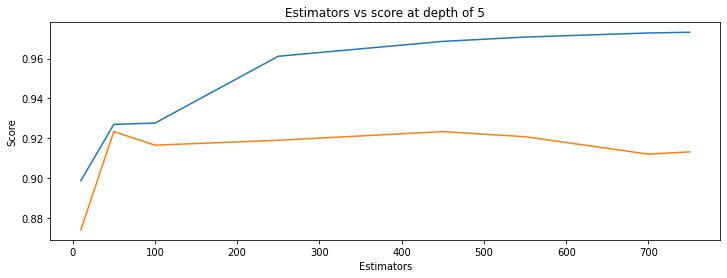

In [ ]:
#Implementing XGBoost Here
estimators = [10,50,100,250,450,550,700,750]
train_scores = []
test_scores = []
for i in estimators:
    clf = XGBClassifier(silent=False, 
                      scale_pos_weight=1,
                      learning_rate=0.01,  
                      colsample_bytree = 0.4,
                      subsample = 0.8,
                      objective='binary:logistic', 
                      n_estimators=i, 
                      reg_alpha = 0.3,
                      max_depth=4, 
                      gamma=10)
    clf.fit(df_final_train,y_train)
    train_sc = f1_score(y_train,clf.predict(df_final_train))
    test_sc = f1_score(y_test,clf.predict(df_final_test))
    test_scores.append(test_sc)
    train_scores.append(train_sc)
    print('Estimators = ',i,'Train Score',train_sc,'test Score',test_sc)
plt.plot(estimators,train_scores,label='Train Score')
plt.plot(estimators,test_scores,label='Test Score')
plt.xlabel('Estimators')
plt.ylabel('Score')
plt.title('Estimators vs score at depth of 5')

Estimators =  10 Train Score 0.8987468187236235 test Score 0.874023694602896
Estimators =  15 Train Score 0.9233213057153978 test Score 0.9084430409456548
Estimators =  25 Train Score 0.9267309174205398 test Score 0.9195382714997657
Estimators =  35 Train Score 0.9254898653990071 test Score 0.9221612691419736
Estimators =  40 Train Score 0.925730673527055 test Score 0.922333799415279
Estimators =  45 Train Score 0.9262387565509896 test Score 0.9231421425240579
Estimators =  50 Train Score 0.9269906841461872 test Score 0.923373351119016
Estimators =  55 Train Score 0.9267256786022161 test Score 0.9151244416081685
Estimators =  60 Train Score 0.9272975814931651 test Score 0.9146118138069077


Text(0.5, 1.0, 'Estimators vs score at depth of 5')

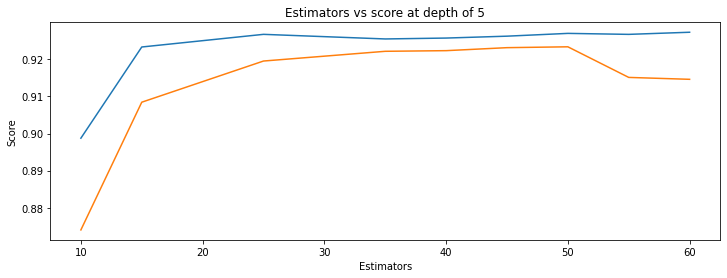

In [ ]:
estimators = [10,15,25,35,40,45,50,55,60]
train_scores = []
test_scores = []
for i in estimators:
    clf = XGBClassifier(silent=False, 
                      scale_pos_weight=1,
                      learning_rate=0.01,  
                      colsample_bytree = 0.4,
                      subsample = 0.8,
                      objective='binary:logistic', 
                      n_estimators=i, 
                      reg_alpha = 0.3,
                      max_depth=4, 
                      gamma=10)
    clf.fit(df_final_train,y_train)
    train_sc = f1_score(y_train,clf.predict(df_final_train))
    test_sc = f1_score(y_test,clf.predict(df_final_test))
    test_scores.append(test_sc)
    train_scores.append(train_sc)
    print('Estimators = ',i,'Train Score',train_sc,'test Score',test_sc)
plt.plot(estimators,train_scores,label='Train Score')
plt.plot(estimators,test_scores,label='Test Score')
plt.xlabel('Estimators')
plt.ylabel('Score')
plt.title('Estimators vs score at depth of 5')

Depth =  2 Train Score 0.9205948018029403 test Score 0.9146623153701074
Depth =  3 Train Score 0.9237252687497386 test Score 0.9188973400008404
Depth =  4 Train Score 0.9269906841461872 test Score 0.923373351119016
Depth =  5 Train Score 0.9310883818515604 test Score 0.9223829390711366
Depth =  8 Train Score 0.9673295167196002 test Score 0.9134871434353763
Depth =  10 Train Score 0.972870167246966 test Score 0.908207805546046
Depth =  12 Train Score 0.976004016064257 test Score 0.9091258733787739
Depth =  15 Train Score 0.9775280898876405 test Score 0.9091686623332192
Depth =  20 Train Score 0.9781313323836848 test Score 0.9068895317689918


Text(0.5, 1.0, 'Depth vs score with n_estimators = 50')

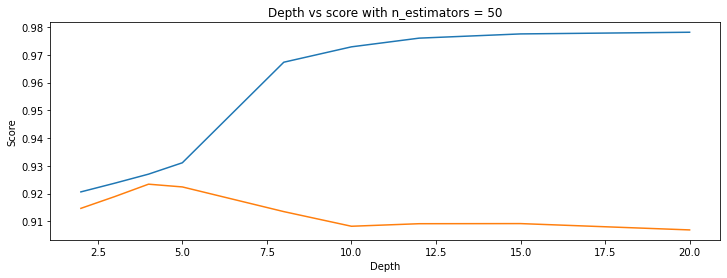

In [ ]:
depths = [2,3,4,5,8,10,12,15,20]
train_scores = []
test_scores = []
for i in depths:
    clf = XGBClassifier(silent=False, 
                      scale_pos_weight=1,
                      learning_rate=0.01,  
                      colsample_bytree = 0.4,
                      subsample = 0.8,
                      objective='binary:logistic', 
                      n_estimators=50, 
                      reg_alpha = 0.3,
                      max_depth=i, 
                      gamma=10)
    clf.fit(df_final_train,y_train)
    train_sc = f1_score(y_train,clf.predict(df_final_train))
    test_sc = f1_score(y_test,clf.predict(df_final_test))
    test_scores.append(test_sc)
    train_scores.append(train_sc)
    print('Depth = ',i,'Train Score',train_sc,'test Score',test_sc)
plt.plot(depths,train_scores,label='Train Score')
plt.plot(depths,test_scores,label='Test Score')
plt.xlabel('Depth')
plt.ylabel('Score')
plt.title('Depth vs score with n_estimators = 50')

In [ ]:
from scipy.stats import randint as sp_randint
from scipy.stats import uniform

In [ ]:

param_dist = {"n_estimators":[40,45,50,55,60],
              "max_depth": [3,4,5,6,7],
              "learning_rate": [0.01,0.05,0.1,0.15,0.2],
              "subsample": [0.75,0.8,0.85,0.9,0.95],
              "gamma": [0,1,5,8,10],
              "colsample_bytree": [0.4,0.6,0.8,0.9,1],
              "reg_alpha": [0.2,0.3,0.4,0.5,0.6]}

clf = XGBClassifier(random_state=25,n_jobs=-1)

xgb_random = RandomizedSearchCV(clf, param_distributions=param_dist,
                                   n_iter=5,cv=10,scoring='f1',random_state=25,return_train_score=True)

xgb_random.fit(df_final_train,y_train)
print('mean test scores',xgb_random.cv_results_['mean_test_score'])
print('mean train scores',xgb_random.cv_results_['mean_train_score'])

mean test scores [0.9741902  0.92802887 0.96636358 0.97428761 0.9773855 ]
mean train scores [0.9749252  0.92821009 0.96688544 0.97487048 0.98057475]


In [ ]:
print(xgb_random.best_estimator_)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.9, gamma=8,
              learning_rate=0.2, max_delta_step=0, max_depth=7,
              min_child_weight=1, missing=None, n_estimators=50, n_jobs=-1,
              nthread=None, objective='binary:logistic', random_state=25,
              reg_alpha=0.4, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=0.95, verbosity=1)


In [ ]:
clf = XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.9, gamma=8,
              learning_rate=0.2, max_delta_step=0, max_depth=7,
              min_child_weight=1, missing=None, n_estimators=50, n_jobs=-1,
              nthread=None, objective='binary:logistic', random_state=25,
              reg_alpha=0.4, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=0.95, verbosity=1)

In [ ]:
clf.fit(df_final_train,y_train)
y_train_pred = clf.predict(df_final_train)
y_test_pred = clf.predict(df_final_test)

In [ ]:
from sklearn.metrics import f1_score
print('Train f1 score',f1_score(y_train,y_train_pred))
print('Test f1 score',f1_score(y_test,y_test_pred))

Train f1 score 0.980836113995383
Test f1 score 0.9314090102273688


In [ ]:
from sklearn.metrics import confusion_matrix
def plot_confusion_matrix(test_y, predict_y):
    C = confusion_matrix(test_y, predict_y)
    
    A =(((C.T)/(C.sum(axis=1))).T)
    
    B =(C/C.sum(axis=0))
    plt.figure(figsize=(20,4))
    
    labels = [0,1]
    # representing A in heatmap format
    cmap=sns.light_palette("blue")
    plt.subplot(1, 3, 1)
    sns.heatmap(C, annot=True, cmap=cmap, fmt=".3f", xticklabels=labels, yticklabels=labels)
    plt.xlabel('Predicted Class')
    plt.ylabel('Original Class')
    plt.title("Confusion matrix")
    
    plt.subplot(1, 3, 2)
    sns.heatmap(B, annot=True, cmap=cmap, fmt=".3f", xticklabels=labels, yticklabels=labels)
    plt.xlabel('Predicted Class')
    plt.ylabel('Original Class')
    plt.title("Precision matrix")
    
    plt.subplot(1, 3, 3)
    # representing B in heatmap format
    sns.heatmap(A, annot=True, cmap=cmap, fmt=".3f", xticklabels=labels, yticklabels=labels)
    plt.xlabel('Predicted Class')
    plt.ylabel('Original Class')
    plt.title("Recall matrix")
    
    plt.show()

Train confusion_matrix


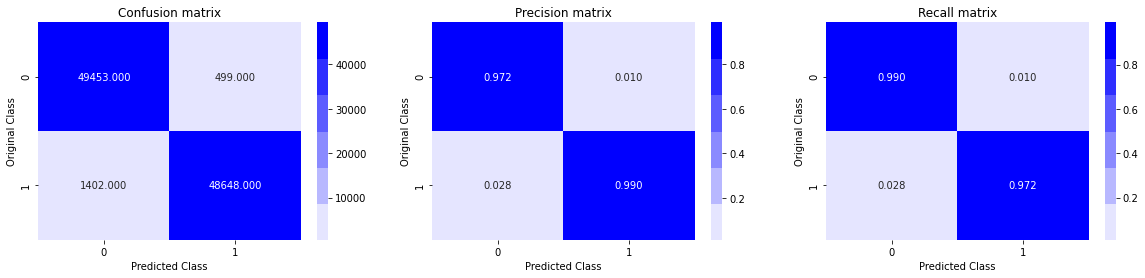

Test confusion_matrix


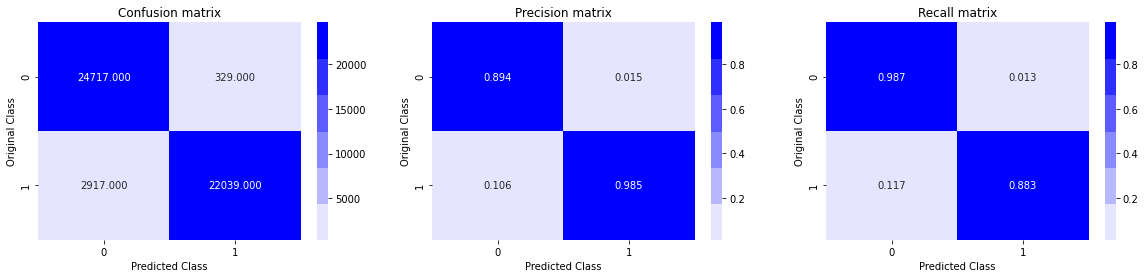

In [ ]:
print('Train confusion_matrix')
plot_confusion_matrix(y_train,y_train_pred)
print('Test confusion_matrix')
plot_confusion_matrix(y_test,y_test_pred)

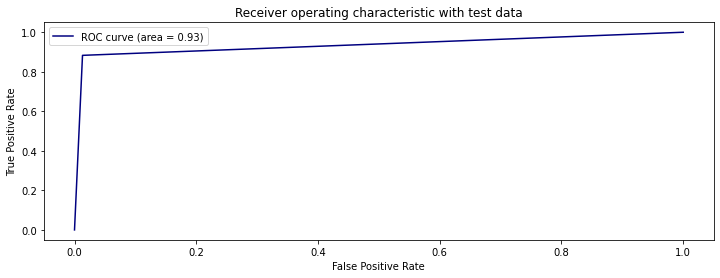

In [ ]:
from sklearn.metrics import roc_curve, auc
fpr,tpr,ths = roc_curve(y_test,y_test_pred)
auc_sc = auc(fpr, tpr)
plt.plot(fpr, tpr, color='navy',label='ROC curve (area = %0.2f)' % auc_sc)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic with test data')
plt.legend()
plt.show()

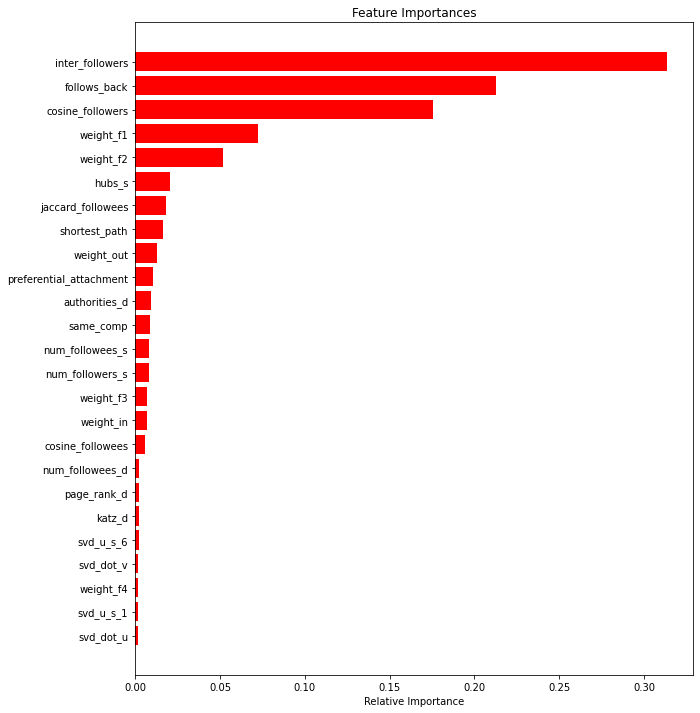

In [ ]:
features = df_final_train.columns
importances = clf.feature_importances_
indices = (np.argsort(importances))[-25:]
plt.figure(figsize=(10,12))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='r', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

####1. For Detailed Explanation of Steps upto addition of Preferential Attachment as a Feature, Please refer to the "**Facebook Case Study - Notes**" pdf attached with this assignment submission

#####2. Preferential Attachment:
######2.1. One well-known concept in social networks is that users with many friends tend to create more connections in the future. This is due to the fact that in some social networks, like in finance, the rich get richer. We estimate how ”rich” our two vertices are by calculating the multiplication between the number of friends (|Γ(x)|) or followers each vertex has. It may be noted that the similarity index does not require any node neighbor information; therefore, this similarity index has the lowest computational complexity.

######3. SVD Dot Feature:
3.1. svd_dot is a Dot product between sourse node svd and destination node svd features.

######4. Apply XGBoostClassifier on all these Features to predict whether link is present or not

######5. Hyperparameter Tune the parameters of XGBoost Classifier to get the best posible metric value for this dataset and set of features

#####**6. Results:**
#####**Train f1 score 0.980836113995383**
#####**Test f1 score 0.9314090102273688**